#UNI Machine Learning Course
#Lab 06:  Support Vector Machines & Kernels

Support Vector Machine (SVM) es uno de los algoritmos de IA más populares y es considerado uno de los 10 mejores algoritmos de IA por el Kernel Trick que se ocupa de la no linealidad y las dimensiones más altas.

* SVM es un algoritmo de aprendizaje supervisado que se utiliza principalmente para la clasificación, pero también se puede utilizar para la regresión. La idea principal es que, basándose en los datos etiquetados (datos de entrenamiento), el algoritmo intenta encontrar el hiperplano óptimo que se puede usar para clasificar nuevos puntos de datos. En dos dimensiones el hiperplano es una línea simple.

* Por lo general, un algoritmo de aprendizaje trata de aprender las características más comunes (lo que diferencia una clase de otra) de una clase y la clasificación se basa en esas características representativas aprendidas (por lo que la clasificación se basa en las diferencias entre clases). 

* SVM funciona al revés. Encuentra los ejemplos más similares entre clases. Esos serán los vectores de soporte. Como ejemplo, consideremos dos clases, manzanas y naranjas.Los otros algoritmos aprenderán las características más evidentes y representativas de las manzanas y los limones, como que las manzanas son rojas y  no son tan redondas mientras que los naranjas son anaranjadas y tienen forma redondas.

* Por el contrario, SVM buscará manzanas que sean muy similares a las naranjas, por ejemplo, manzanas que sean anaranjadas y tengan forma muy redonda y estos serán los vector de soporte. El otro vector de soporte serán naranjas similar a una manzana (rojas y no tan redondas). Entonces, otros algoritmos aprenden las diferencias mientras que SVM aprende las similitudes.

#SVM usando LinearSVC del sklearn

In [22]:
# cargar librerias
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

# Carga datos con solo dos clases y dos características
iris = datasets.load_iris()
X = iris.data[:1000,:2]
y = iris.target[:1000]

# Funciones estandarizadas
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Crear clasificador 
svc = LinearSVC(C=7.0,max_iter=10000)

# Train model
model = svc.fit(X_std, y)


#Límite de Decisión Hiperplano
En esta visualización, todas las observaciones de la clase 0 son rojas y las observaciones de la clase 1 son de color azul. El hiperplano es el límite de decisión que decide cómo se clasifican las nuevas observaciones. Cualquier observación sobre la línea se clasificará como clase 0, mientras que cualquier observación debajo de la línea se clasificará como clase 1

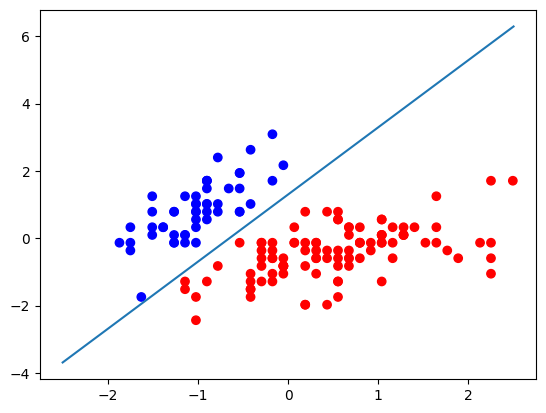

In [23]:
# Plot data points and color using their class
# color = ['black' if c == 0 else 'lightgrey' for c in y]
color = ['blue' if c == 0 else 'red' for c in y]

plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.show();

#SVM usando svm del sklearn

In [40]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
import pandas as pd

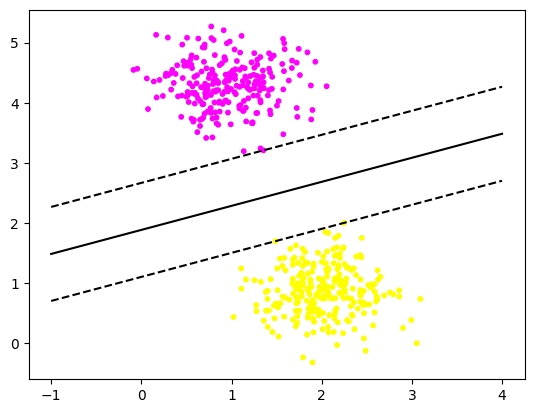

In [50]:
# Y containing two classes
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=0, cluster_std=0.40)
# plotting our dataset 
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='spring');

#split my data set into 80% training and 20% test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# #the SVM classification of dataset
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 4)
yy = a * xx - (svclassifier.intercept_[0]) / w[1]
b = svclassifier.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svclassifier.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1],
            s=80, facecolors='none')

#Parámetros de SVC cuando se usa el kernel RBF
En este tutorial, exploraremos visualmente los efectos de los dos parámetros del clasificador de vectores de soporte (SVC) cuando usemos el kernel (RBF).

In [ ]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

#Generar datos
Aquí estamos generando algunos datos no linealmente separables en los que entrenaremos a nuestro clasificador. Hay dos clases en nuestro vector x azules y cuadrados rojos.

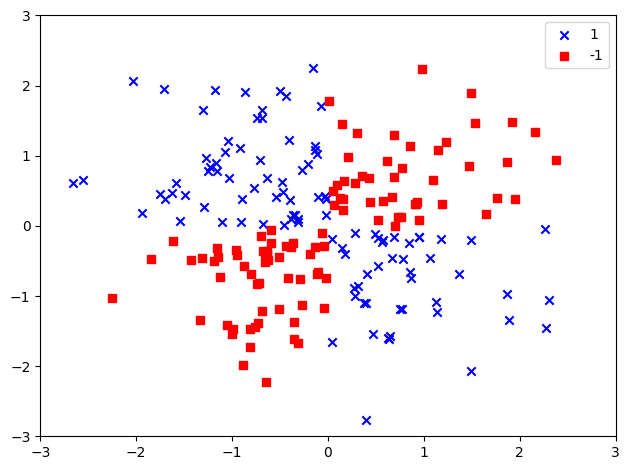

In [71]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',marker='s',label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#Crear función para visualizar las regiones de clasificación
Puedes ignorar el siguiente código. Se utiliza para visualizar las regiones de decisión del clasificador. Sin embargo, no es importante para este tutorial entender cómo funciona esta función.

In [72]:
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
     

#Clasificar utilizando un kernel lineal
La forma más básica de usar un SVC es con un kernel lineal, lo que significa que el límite de decisión es una línea recta (o un hiperplano en dimensiones más altas). 
Los kernels lineales rara vez se usan en la práctica, sin embargo es la versión más básica de SVC. Como se puede ver a continuación, no es muy bueno para clasificar (lo que pueden ver todas las X azules en la región roja) porque los datos no son lineales.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


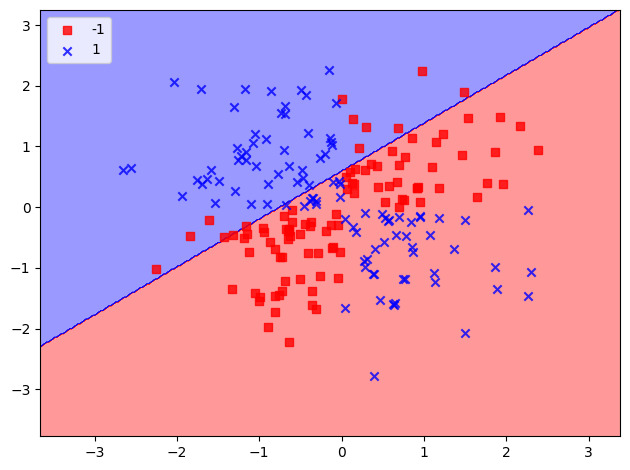

In [73]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Gamma = 0.01
En el caso de nuestro clasificador y datos SVC, cuando se utiliza un gamma bajo como 0.01, el límite de decisión no es muy "curvilínea", sino que es solo un gran arco de barrido.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


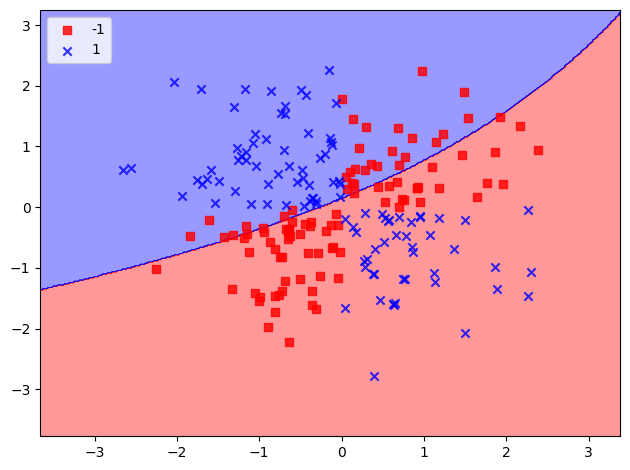

In [74]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf',  gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Gamma = 1.0
Puede ver una gran diferencia cuando aumentamos la gama a 1. Ahora el límite de decisión está comenzando a cubrir mejor la extensión de los datos.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


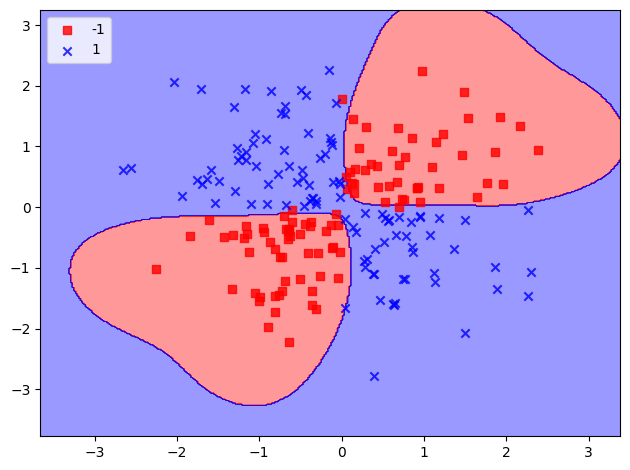

In [75]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Gamma = 10.0 
En gamma = 10 la propagación del núcleo es menos pronunciada. El límite de decisión comienza a ser altamente afectado por puntos de datos individuales (es decir, varianza).

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


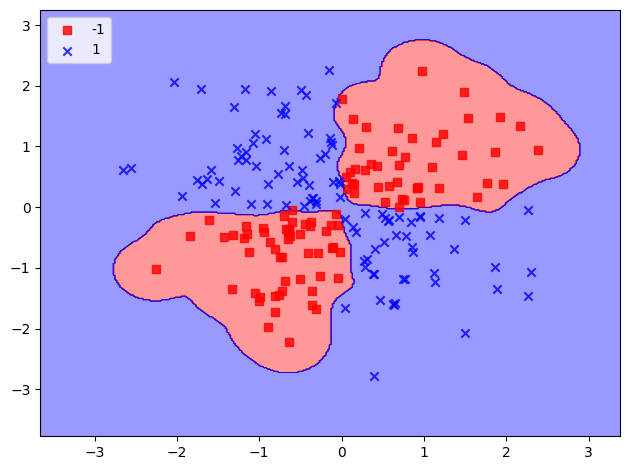

In [76]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Gamma = 100.0
Con gamma alta, el límite de decisión depende casi totalmente de los puntos de datos individuales, creando "islas". Esta información está claramente superpuesta.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


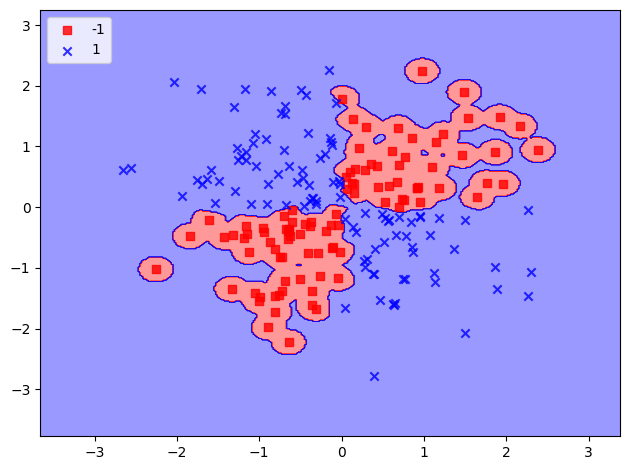

In [77]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#C - El parámetro de penalización
Ahora repetiremos el proceso para C: usaremos el mismo clasificador, los mismos datos y manteneremos la constante gamma. Lo único que cambiaremos es la C, la penalización por error de clasificación.

#C = 1
Con C = 1, el clasificador es claramente tolerante con los puntos de datos clasificados erróneamente. Hay muchos puntos rojos en la región azul y puntos azules en la región roja.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


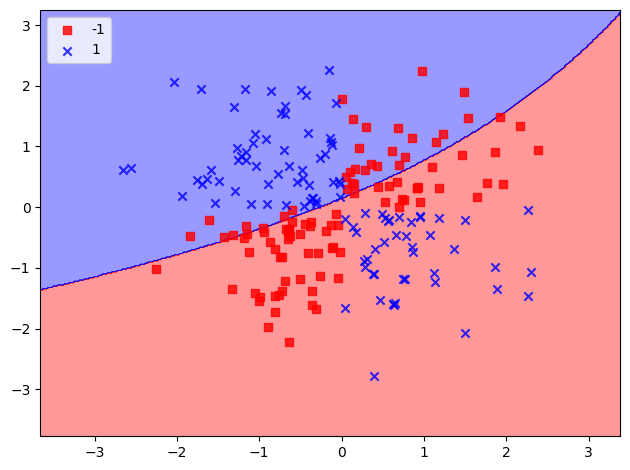

In [83]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#C = 10
En C = 10, el clasificador es menos tolerante a los puntos de datos clasificados erróneamente y, por lo tanto, el límite de decisión es más grave.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


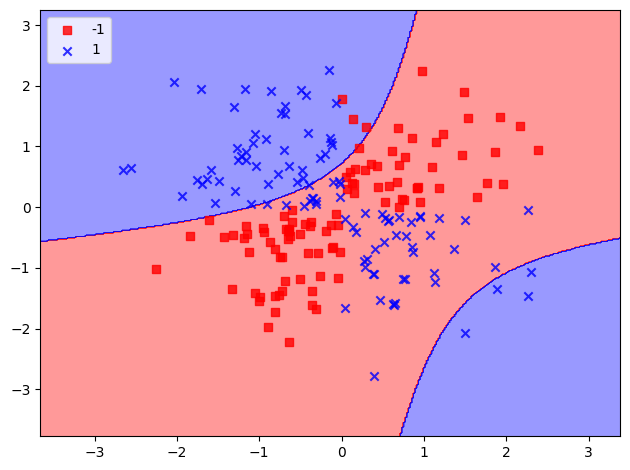

In [82]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#C = 1000
Cuando C = 1000, el clasificador comienza a ser muy intolerante a los puntos de datos clasificados erróneamente y, por lo tanto, el límite de decisión se vuelve menos sesgado y tiene más varianza (es decir, más dependiente de los puntos de datos individuales).

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


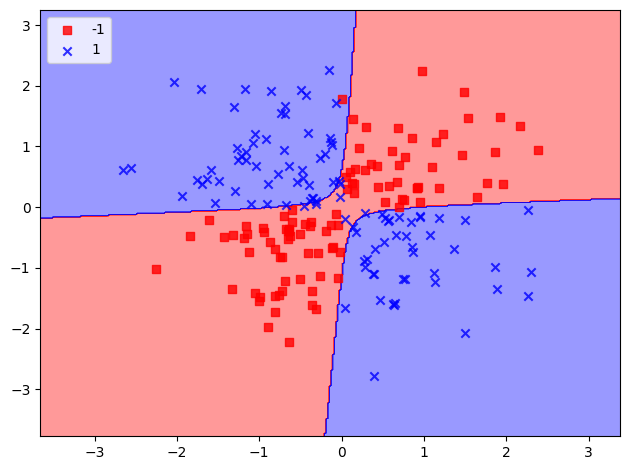

In [81]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#C = 10000
En C = 10000, el clasificador "trabaja muy duro" para no clasificar erróneamente los puntos de datos y vemos signos de exceso de ajuste.

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


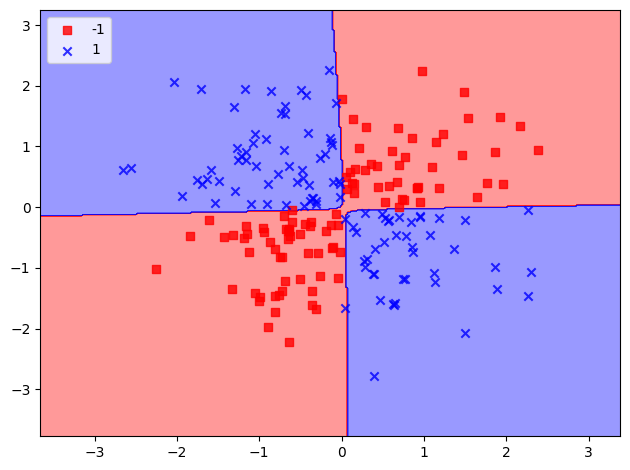

In [84]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=.01, C=10000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#C = 100000
En C = 100000, el clasificador está fuertemente penalizado por cualquier punto de datos mal clasificado y, por lo tanto, los márgenes son pequeños

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


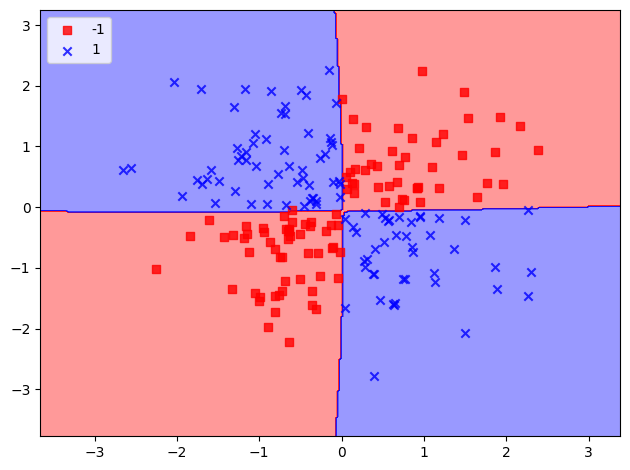

In [85]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', gamma=.01, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Diferentes clasificadores de SVM en el set de datos del iris

Comparación de diferentes clasificadores SVM lineales en una proyección 2D del conjunto de datos del iris. Solo consideramos las 2 primeras características de este conjunto de datos.



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


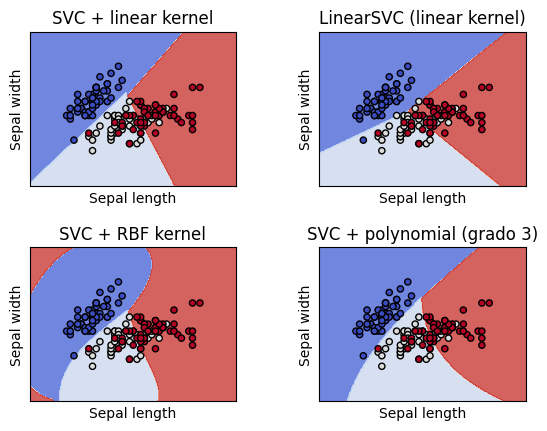

In [92]:
from sklearn import svm, datasets

def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
    
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC + linear kernel',
          'LinearSVC (linear kernel)',
          'SVC + RBF kernel',
          'SVC + polynomial (grado 3)')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#The Iris flower data set 
El iris dataset es un set de datos de clasificación multiclase clásico y muy util.
https://archive.ics.uci.edu/ml/datasets/iris

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


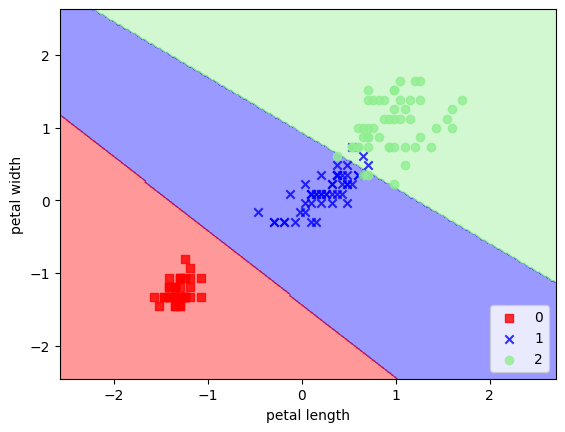

In [99]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.svm import SVC, LinearSVC

svm = SVC(kernel='linear', C=1.0, random_state=0)

svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,y_combined, classifier=svm,)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='lower right')
plt.show()

#RBF kernel SVM para conjunto de datos de iris

En esta sección, aplicaremos RMF kernel SVM a nuestro conjunto de datos de flor de Iris:

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


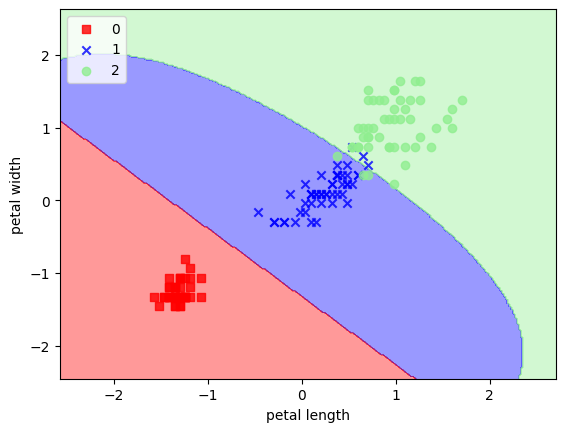

In [100]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma=0.20, C=10.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# draw decision boundary
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Si aumentamos el valor de gamma y se observa el efecto en el límite de decisión:

podemos ver en la imagen de arriba, el límite de decisión en torno a las clases 0 y 1 es mucho más estricto con un valor relativamente grande de gamma

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


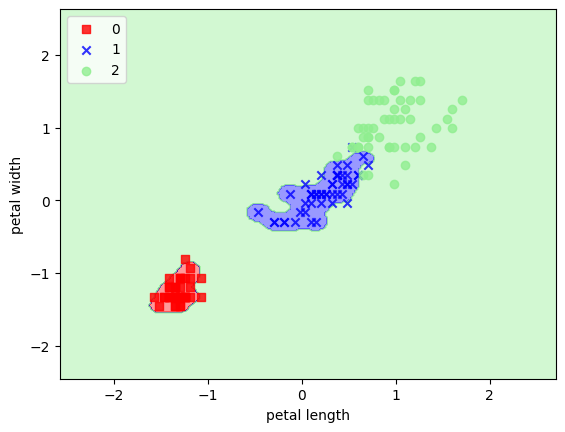

In [101]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=10.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# draw decision boundary
plot_decision_regions(X_combined_std, y_combined,classifier=svm,)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

#Polynomial Kernel

<ipython-input-72-e774200c0c7b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


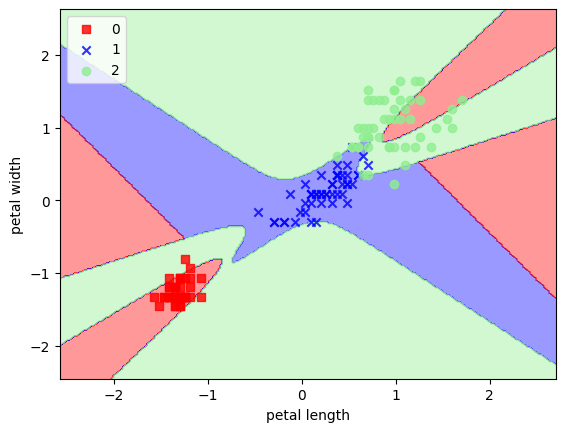

In [105]:
svm = SVC(kernel='poly', degree=4, gamma=100.0, C=10.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# draw decision boundary
plot_decision_regions(X_combined_std, y_combined,classifier=svm,)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# SVM: muestras ponderadas
Representación gráfica de la función de decisión de un conjunto de datos ponderado, donde el tamaño de los puntos es proporcional a su peso.

La ponderación de la muestra vuelve a escalar el parámetro C, lo que significa que el clasificador pone más énfasis en obtener estos puntos correctamente. El efecto a menudo puede ser sutil. Para enfatizar el efecto aquí, destacamos especialmente los valores atípicos, lo que hace que la deformación del límite de decisión sea muy visible.

In [108]:
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)

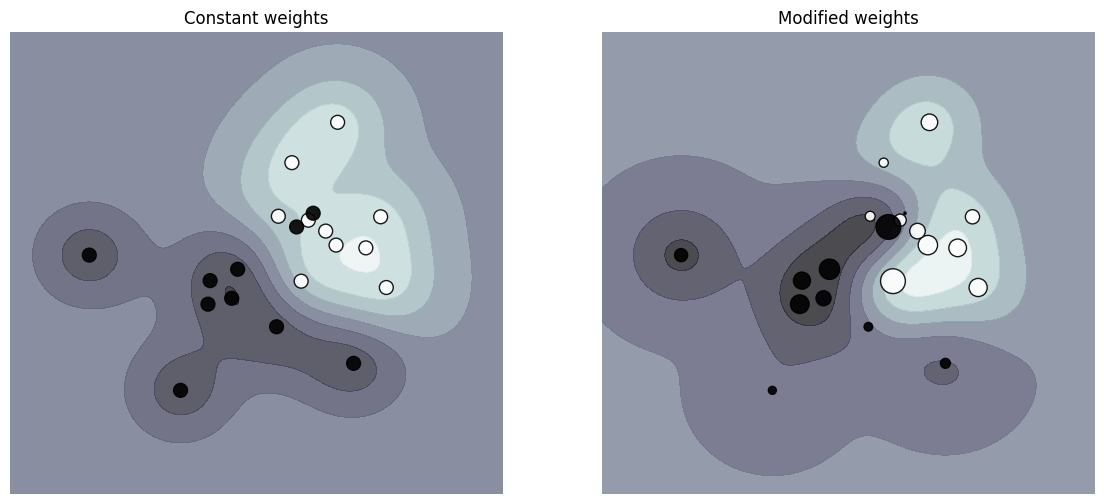

In [121]:
from sklearn import svm
# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_1 = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))

# and bigger weights to some outliers
sample_weight_1[15:] *= 5
sample_weight_1[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_1)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],"Constant weights")
plot_decision_function(clf_weights, sample_weight_1, axes[1],"Modified weights")
plt.show()